
Sektördeki hisselerin aylık getirileri üzerinden bir hesaplama yaptım. Yüzdelik kısmını tam sayı olarak çevirdim.
---



In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import tsfresh
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def get_ts(sembol):
    data = yf.download(sembol, start="2005-01-01")
    data_close=data['Adj Close'].resample('M').last().pct_change()*100

    df  = pd.DataFrame({'close': data_close})
    df['id'] = sembol


    return df

def set_ts(semboller):
  merged_ts = pd.DataFrame()
  for sembol in semboller:
      try:
          ts = get_ts(sembol)
          merged_ts = pd.concat([merged_ts, ts])
      except Exception as e:
          # Hata meydana geldiğinde hatayı görmezden gel, devam et
          print(f"Hata: {e}. {sembol} sembolü işlenemedi.")
          continue

  return merged_ts

def tsfresh_impl(data, sektor_adi):

  data = data.dropna()

  df = tsfresh.extract_features(data, column_id='id',
                                       default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())

  df['sektor'] = sektor_adi

  return df



In [ ]:
pip install feature-engine

In [ ]:
sectors=fetch_sectors_names()
sectors

In [ ]:
fetch_data(sectors='financials').to_csv('financials.csv')
fetch_data(sectors='healthcare').to_csv('healthcare.csv')
fetch_data(sectors='technology').to_csv('technology.csv')

finance = pd.read_csv('/content/financials.csv')
healthcare = pd.read_csv('/content/healthcare.csv')
technology = pd.read_csv('/content/technology.csv')

sembol_finance = [sembol for sembol in finance.Symbol]
sembol_healthcare = [sembol for sembol in healthcare.Symbol]
sembol_technology = [sembol for sembol in technology.Symbol]

In [ ]:
data1 = set_ts(sembol_finance)
data2 = set_ts(sembol_healthcare)
data3 = set_ts(sembol_technology)

In [ ]:
financial_df = tsfresh_impl(data1, 'finans')
healthcare_df = tsfresh_impl(data2, 'saglik')
tech_df = tsfresh_impl(data3, 'teknoloji')

# Verileri birleştirme
df = pd.concat([financial_df, healthcare_df, tech_df], ignore_index=True)

tsfresh işlemi uzun sürdüğü için datayı buradan çekebiliriz

In [255]:
df = pd.read_csv('/content/df.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,close__variance_larger_than_standard_deviation,close__has_duplicate_max,close__has_duplicate_min,close__has_duplicate,close__sum_values,close__abs_energy,close__mean_abs_change,close__mean_change,close__mean_second_derivative_central,close__median,...,close__fourier_entropy__bins_5,close__fourier_entropy__bins_10,close__fourier_entropy__bins_100,close__permutation_entropy__dimension_3__tau_1,close__permutation_entropy__dimension_4__tau_1,close__permutation_entropy__dimension_5__tau_1,close__permutation_entropy__dimension_6__tau_1,close__permutation_entropy__dimension_7__tau_1,close__mean_n_absolute_max__number_of_maxima_7,sektor
0,0.0,0.0,0.0,1.0,12.239909,16.512171,0.787154,0.018328,-0.008142,0.352214,...,0.860851,1.401945,2.523211,1.714081,2.775262,3.178054,3.135494,3.091042,1.315555,finans
1,0.0,0.0,0.0,0.0,3.967764,1.951028,0.122048,-0.001534,-0.000087,0.391016,...,0.673012,1.054920,1.609438,1.277034,1.791759,1.609438,1.386294,1.098612,0.484277,finans
2,1.0,0.0,0.0,0.0,99.970656,30179.298981,33.679020,1.156313,-0.969076,1.092229,...,0.793730,1.311431,2.204785,1.756276,2.450396,2.926418,2.944439,2.890372,55.383400,finans
3,1.0,0.0,0.0,1.0,186.773527,39652.133973,12.034051,0.001110,-0.006034,0.000000,...,1.058797,1.637539,3.585899,1.787731,3.126615,4.412026,5.174994,5.362136,47.435890,finans
4,1.0,0.0,0.0,0.0,217.325358,19545.726021,9.175568,-0.007417,0.030930,1.534544,...,0.845854,1.462216,3.440675,1.783880,3.126882,4.450156,5.172668,5.362136,29.664746,finans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,1.0,0.0,0.0,0.0,-156.509749,10317.718213,13.122968,0.035344,-0.291407,0.199010,...,1.261002,1.803298,2.761626,1.692020,2.686452,3.225557,3.412490,3.422414,33.697025,teknoloji
2982,1.0,0.0,0.0,0.0,-64.228714,9858.768501,19.713546,0.348081,-0.278802,-0.456150,...,1.400101,1.785545,2.751102,1.722790,2.782541,3.383739,3.619565,3.663562,27.398670,teknoloji
2983,1.0,0.0,0.0,0.0,62.398993,15401.799260,15.689350,-0.288998,-0.154049,-0.546672,...,0.702683,1.321756,2.776913,1.771294,2.764191,3.549043,3.886296,3.970292,36.135351,teknoloji
2984,1.0,0.0,0.0,0.0,281.605146,19285.691440,17.273080,-0.370369,-0.027552,2.702015,...,1.313664,1.849426,3.259569,1.745471,2.890359,3.809076,4.080547,4.147646,37.067057,teknoloji


bir sütunda yüzde en fazla yüzde 30 boş değer olacak şekilde sütun elemesi yaptım   

In [257]:
df = df.dropna(thresh=int(0.7 * len(df)), axis=1)
df.isna().sum().sum()

35377

In [258]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.replace([np.inf, -np.inf], np.nan, inplace=True)



In [259]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train

,close__variance_larger_than_standard_deviation,close__has_duplicate_max,close__has_duplicate_min,close__has_duplicate,close__sum_values,close__abs_energy,close__mean_abs_change,close__mean_change,close__mean_second_derivative_central,close__median,...,close__fourier_entropy__bins_3,close__fourier_entropy__bins_5,close__fourier_entropy__bins_10,close__fourier_entropy__bins_100,close__permutation_entropy__dimension_3__tau_1,close__permutation_entropy__dimension_4__tau_1,close__permutation_entropy__dimension_5__tau_1,close__permutation_entropy__dimension_6__tau_1,close__permutation_entropy__dimension_7__tau_1,close__mean_n_absolute_max__number_of_maxima_7
271,1.0,0.0,0.0,1.0,110.933948,16605.148430,7.713998,-0.023022,0.039579,0.455189,...,0.501022,0.928589,1.587444,3.612438,1.785776,3.143099,4.516612,5.220449,5.386891,30.614767
2907,1.0,0.0,0.0,0.0,-18.652312,2787.325897,27.085213,-2.384750,11.356928,0.947878,...,0.636514,0.636514,1.098612,1.098612,1.098612,0.693147,-0.000000,NaN,NaN,NaN
369,1.0,0.0,0.0,1.0,222.977953,18407.153687,9.586975,0.043464,-0.008341,0.333365,...,0.551883,0.993052,1.640314,3.440661,1.778664,3.098473,4.281320,4.895431,5.043425,36.461035
776,1.0,0.0,0.0,1.0,3.095031,221.091384,2.148011,-0.029154,0.097781,0.153120,...,0.993268,1.410792,2.059229,2.944439,1.757390,2.918680,3.189454,3.344549,3.354988,4.192874
1217,1.0,0.0,0.0,0.0,372.316277,88219.200046,28.282642,-0.934050,-0.012821,1.970806,...,0.727388,1.190723,1.768758,2.949012,1.775972,2.989731,3.665487,3.813439,3.850148,89.695026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.0,0.0,0.0,455.464144,110946.439285,17.857067,0.029383,0.017989,0.997914,...,0.612253,1.060878,1.684760,3.550894,1.779137,3.124416,4.429004,5.172668,5.349758,87.111583
835,1.0,0.0,0.0,1.0,19.461278,164.590872,1.190452,-0.120562,-0.054639,0.307374,...,0.654670,1.041979,1.459359,2.630253,1.725019,2.651079,3.104074,3.354988,3.367296,3.777891
1653,1.0,0.0,0.0,0.0,-37.482954,28781.167105,31.353923,0.292788,-1.880143,-5.551355,...,0.972481,1.517307,1.937200,2.725550,1.772453,2.860815,3.292449,3.433987,3.401197,51.263075
2607,1.0,0.0,0.0,0.0,356.015020,23196.664914,19.230905,-0.186692,-0.285096,3.019539,...,0.949435,1.449606,2.059003,3.196760,1.784514,3.044041,3.922475,4.257412,4.262680,38.175691


Burada pipeline yapısı kullanarak

*   Boş değerleri doldur
*   %70 ve üzeri veri sabitse kaldır
*   aynı sütunlardan biri kalsın diğerlerini ele
*   Korelasyon değeri %80 ve üzeri olan sütunlardan biri kalsın diğerleini ele





In [260]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('constant_var', DropConstantFeatures(tol=0.70)),
    ('dublicated_var', DropDuplicateFeatures()),
    ('correlation', DropCorrelatedFeatures(method='pearson', threshold=0.8))
])

transformed_X_train = preprocessor.fit_transform(X_train)
transformed_X_test = preprocessor.transform(X_test)


In [261]:
transformed_X_train

,x4,x7,x8,x9,x11,x13,x15,x16,x19,x20,...,x424,x425,x426,x427,x437,x439,x443,x444,x446,x449
0,110.933948,-0.023022,0.039579,0.455189,230.0,17.588143,-1.245810,9.322759,10.0,11.0,...,0.104348,0.056522,0.021739,0.017391,0.556522,0.121739,0.565217,0.177685,0.928589,1.785776
1,-18.652312,-2.384750,11.356928,0.947878,5.0,-6.249663,-0.168091,-2.622380,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.600000,0.600000,1.000000,0.636514,0.636514,1.098612
2,222.977953,0.043464,-0.008341,0.333365,161.0,7.655444,2.018169,15.758956,8.0,8.0,...,0.074534,0.043478,0.031056,0.018634,0.571429,0.142857,0.571429,0.294175,0.993052,1.778664
3,3.095031,-0.029154,0.097781,0.153120,36.0,28.807837,1.921121,13.698831,5.0,7.0,...,0.083333,0.055556,0.055556,0.027778,0.611111,0.222222,0.694444,0.623655,1.410792,1.757390
4,372.316277,-0.934050,-0.012821,1.970806,53.0,5.721004,2.295055,7.387202,8.0,4.0,...,0.075472,0.056604,0.037736,0.037736,0.547170,0.207547,0.754717,0.572281,1.190723,1.775972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,455.464144,0.029383,0.017989,0.997914,230.0,11.045716,2.791683,20.833556,8.0,6.0,...,0.078261,0.043478,0.026087,0.013043,0.534783,0.108696,0.530435,0.250955,1.060878,1.779137
2384,19.461278,-0.120562,-0.054639,0.307374,35.0,3.769624,2.240752,8.605449,17.0,3.0,...,0.085714,0.085714,0.057143,0.057143,0.742857,0.257143,0.685714,0.348832,1.041979,1.725019
2385,-37.482954,0.292788,-1.880143,-5.551355,36.0,-27.137947,1.741997,4.587180,7.0,4.0,...,0.083333,0.055556,0.055556,0.027778,0.333333,0.305556,0.805556,0.623655,1.517307,1.772453
2386,356.015020,-0.186692,-0.285096,3.019539,77.0,3.618318,0.044565,0.309296,5.0,5.0,...,0.155844,0.077922,0.012987,0.000000,0.584416,0.311688,0.779221,0.540204,1.449606,1.784514


In [262]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaler_std.fit(transformed_X_test)
X_train = scaler_std.transform(transformed_X_train)
X_test = scaler_std.transform(transformed_X_test)


In [263]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector= SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train, y_train)
Xtrain = selector.transform(X_train)
Xtest = selector.transform(X_test)

In [264]:
imputed_df = pd.DataFrame(Xtrain)
imputed_df

,0,1,2,3,4,5,6,7,8,9
0,0.020329,0.797938,-0.719944,-0.912275,-0.770771,-0.878694,-0.688682,-0.778563,-0.562039,-0.774026
1,-2.603839,-1.256135,0.309912,2.043334,-0.850575,-1.318421,-0.765447,-0.858312,-0.654288,3.170105
2,0.046739,0.878967,-0.604130,-0.850821,-0.744675,-0.804101,-0.669614,-0.707487,-0.575390,-0.795643
3,0.012224,1.367047,-1.421692,-1.423102,-0.841183,-1.146076,-0.759758,-0.855154,-0.653183,-1.211116
4,-4.829824,-0.876716,1.138374,2.377518,4.718962,2.586805,3.605214,1.829916,0.526929,0.717263
...,...,...,...,...,...,...,...,...,...,...
2383,-0.292005,0.081103,0.075793,-0.310163,-0.476442,-0.366248,-0.422190,-0.464532,-0.292038,-0.149793
2384,0.012076,1.446005,-1.395689,-1.591296,-0.848438,-1.252127,-0.762364,-0.856477,-0.652787,-1.200634
2385,-0.148990,-0.812565,0.784725,0.697333,0.622020,0.402238,1.018727,0.039763,-0.029051,-0.011960
2386,0.107367,0.010283,0.612728,0.595313,-0.194849,0.012443,0.544494,0.122756,0.148271,0.212867


<Axes: >

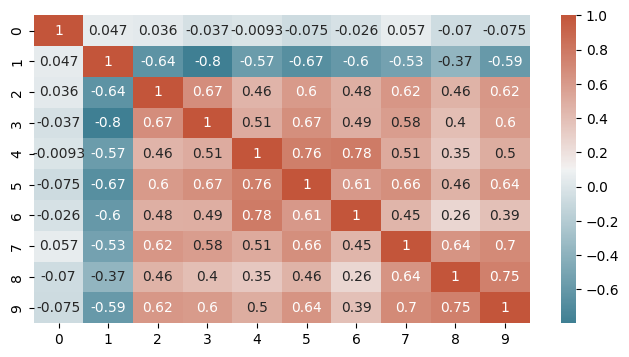

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
# Korelasyon matrisini görselleştirelim
corrmat=imputed_df.corr(method='pearson')
corrmat
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, annot=True)

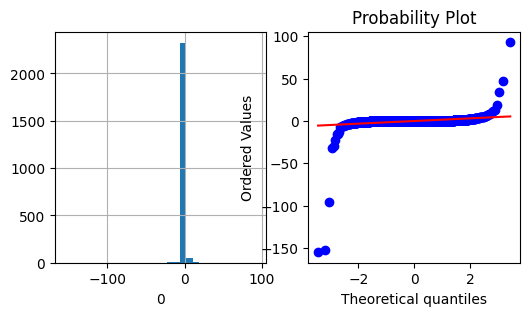

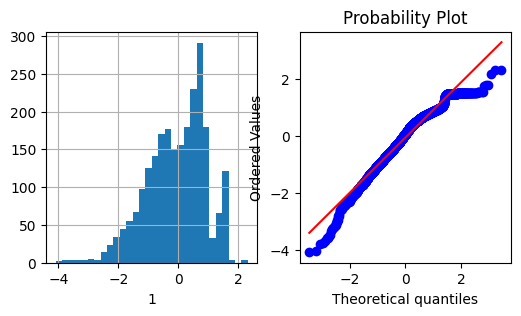

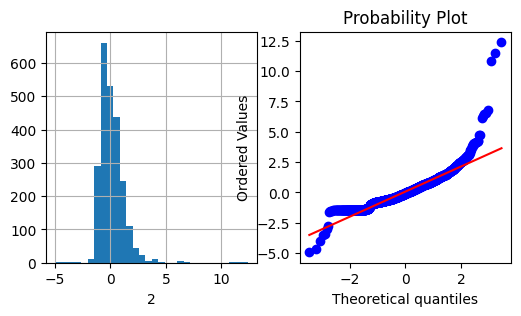

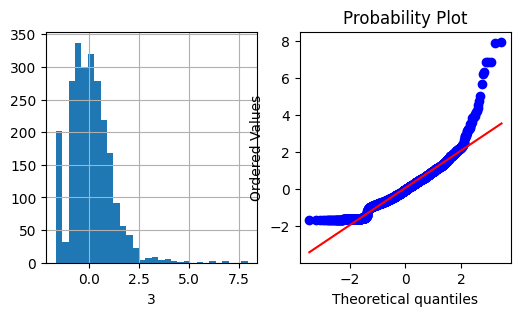

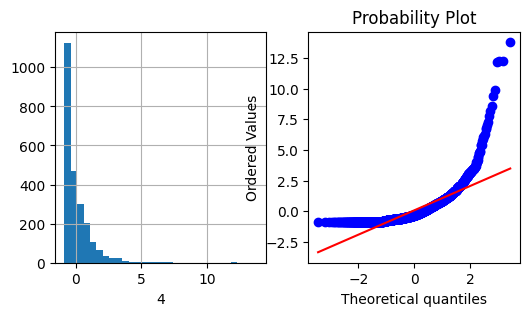

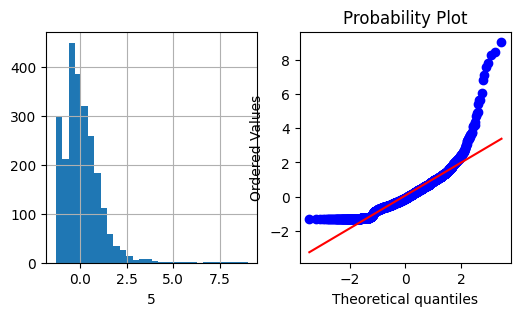

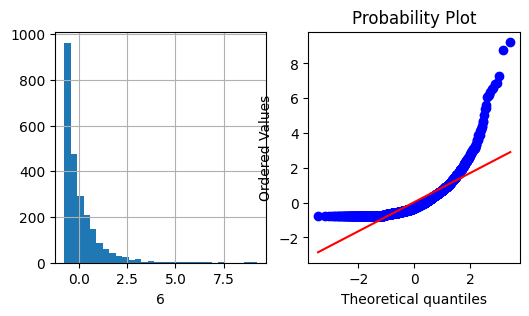

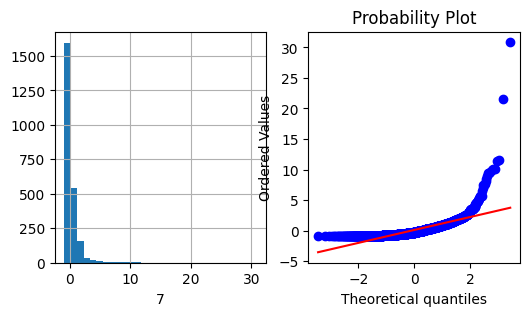

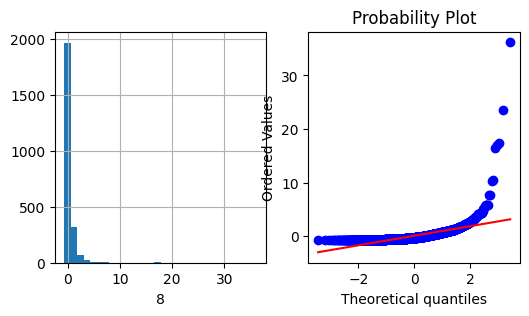

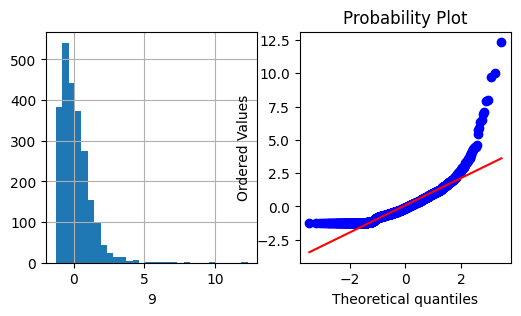

In [266]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def diagnostic_plots(df, variable, label=None):
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.xlabel(str(variable))
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

for column in imputed_df.columns:
    diagnostic_plots(imputed_df, column, label=column)



Verimizin dağılımını inceledim ve transformation uyguladım

In [267]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
#transformer = FunctionTransformer(func=np.log1p)
Xtrain = transformer.fit_transform(Xtrain)
Xtest = transformer.transform(Xtest)


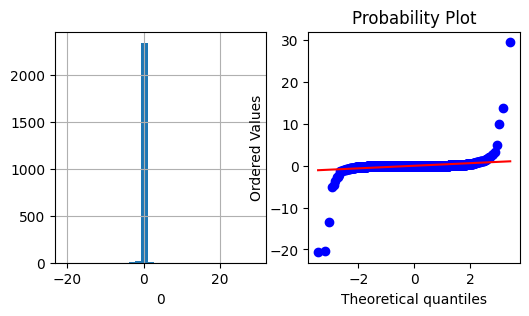

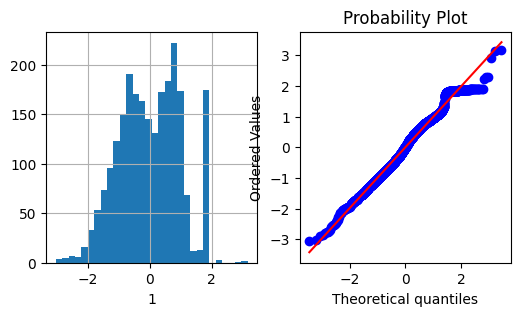

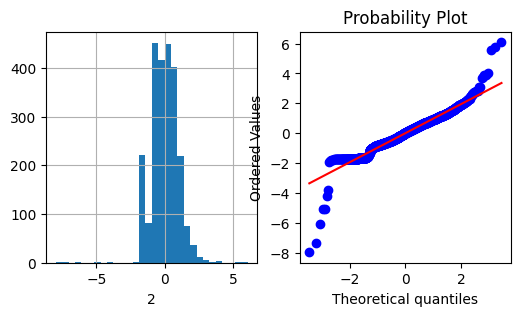

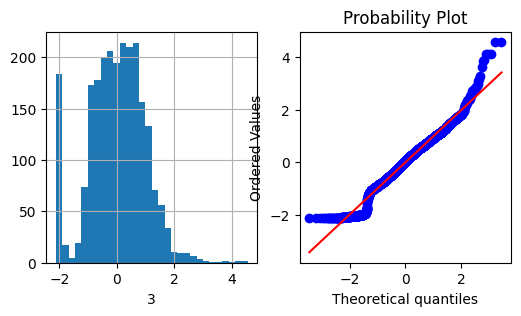

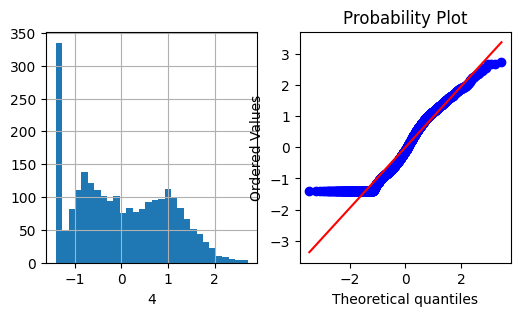

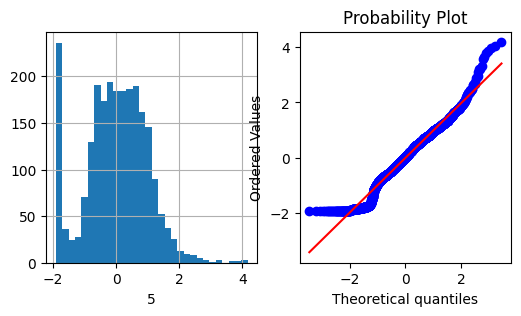

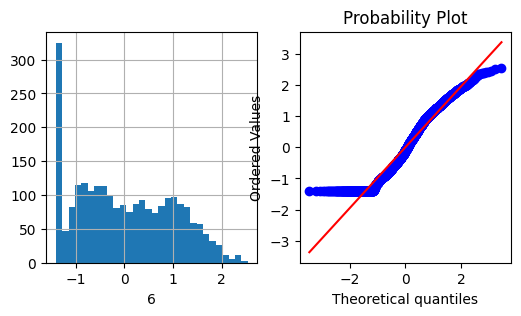

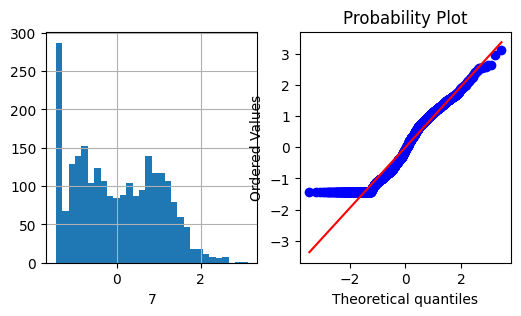

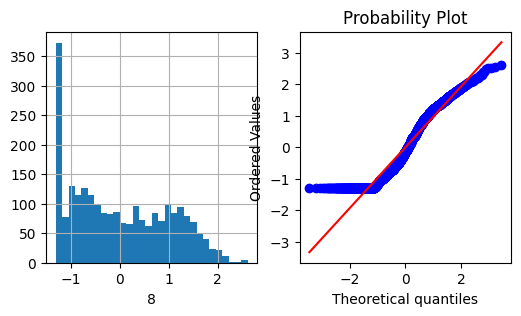

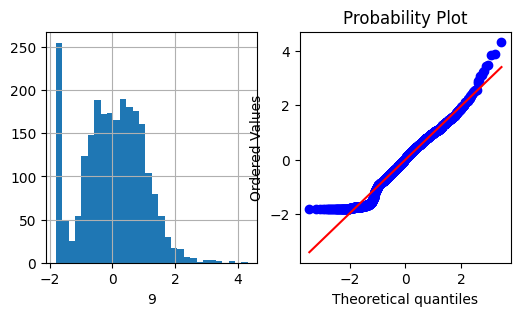

In [268]:
dff = pd.DataFrame(Xtrain)
dff_test = pd.DataFrame(Xtest)
dff.isna().sum().sum()
for column in dff:
    diagnostic_plots(dff, column, label=column)

In [269]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='gaussian', tail='both', variables=list(dff.columns))

winsorizer.fit(dff)
X_train_winsor=winsorizer.transform(dff)
X_test_winsor = winsorizer.transform(dff_test)

winsorizer uygulanmış data


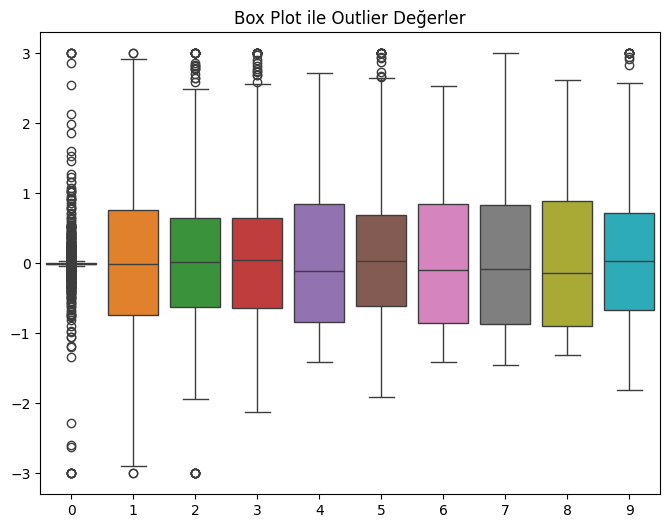

In [287]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train_winsor)
plt.title("Box Plot ile Outlier Değerler")
plt.show()


LDA kullanarak özellik çıkarımı yaptım

In [271]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit_transform(X_train_winsor,y_train)
xtest_lda=lda.transform(X_test_winsor)

X_train = x_lda
X_test = xtest_lda

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
svm = SVC(C=3)

y_pred_knn = knn.predict(X_test)
svm.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred = svm.predict(X_test)
# Modelin doğruluğunu değerlendirelim
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred)

print("KNN Model Accuracy:", accuracy_knn)
print("Model Accuracy:", accuracy)


KNN Model Accuracy: 0.6421404682274248
Model Accuracy: 0.677257525083612


In [283]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm = SVC(C=5)

scores = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')

print("Mean cross validation score:", scores.mean())

svm.fit(X_train, y_train)

test_score = svm.score(X_test, y_test)
print("Test set accuracy:", test_score)

Mean cross validation score: 0.6323353609226118
Test set accuracy: 0.6789297658862876
